In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg
/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/

### How autoencoder work

Autocoder is invented to reconstruct high-dimensional data using a neural network model with a narrow bottleneck layer in the middle 

Autoencoder is a neural network designed to learn an identity function in an unsupervised way to reconstruct the original input while compressing the data in the process so as to discover a more efficient and compressed representation.

It consists of two networks:
**Encoder network**: It translates the original high-dimension input into the latent low-dimensional code. The input size is larger than the output size.

**Decoder network**: The decoder network recovers the data from the code, likely with larger and larger output layers.

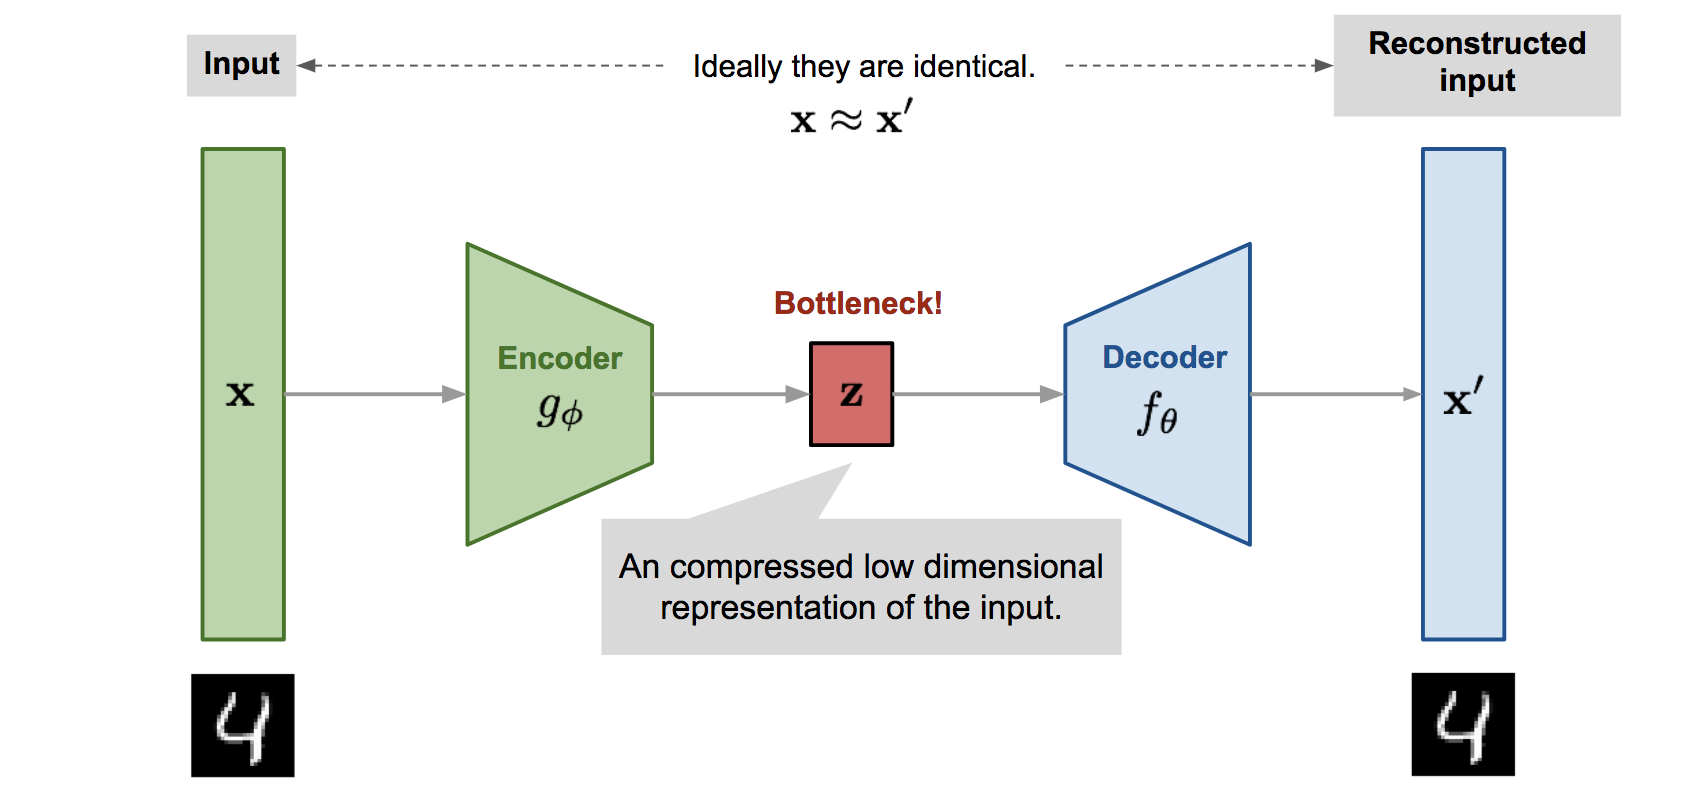

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np


from tensorflow.keras import layers
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])


df_train=pd.read_csv('../input/nslkdd/KDDTrain+.txt',header=None,names=columns)
df_test=pd.read_csv('../input/nslkdd/KDDTest+.txt',header=None,names=columns)

#  **Autoencoder**

In [4]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
df_train['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [7]:
df_train.attack=df_train.attack.apply(lambda x: 0 if x == 'normal' else 1)

In [8]:
df_test.attack=df_test.attack.apply(lambda x: 0 if x == 'normal' else 1)

In [9]:
df_test['attack'].value_counts()

1    12833
0     9711
Name: attack, dtype: int64

In [10]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,20


In [11]:
#label encoding 
def label_encoding(df):
    for column in df.columns:
        if df[column].dtype == np.object:
            encoded = LabelEncoder()
        
            encoded.fit(df[column])
            df[column] = encoded.transform(df[column])
    return df

In [12]:
label_encoding(df_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,20
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,21
125970,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0,18
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,20


In [13]:
label_encoding(df_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,45,1,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
1,0,1,45,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
2,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,21
3,0,0,13,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,15
4,1,1,55,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0,21
22540,0,1,22,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0,21
22541,0,1,22,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,15
22542,0,2,11,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0,21


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

In [16]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,1.000000
1,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,1.000000
2,0.000035,0.5,0.301587,0.9,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0.0,1.000000
3,0.000000,0.0,0.206349,0.9,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1.0,0.714286
4,0.000017,0.5,0.873016,0.2,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1.0,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,0.5,0.777778,0.9,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.000000
22540,0.000000,0.5,0.349206,0.9,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.000000
22541,0.000000,0.5,0.349206,0.9,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1.0,0.714286
22542,0.000000,1.0,0.174603,0.9,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.0,1.000000


In [17]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0.000000,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0,0.952381
1,0.000000,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.714286
2,0.000000,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0,0.904762
3,0.000000,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,1.000000
4,0.000000,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1.0,0.952381
125969,0.000186,1.0,0.710145,0.9,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.0,1.000000
125970,0.000000,0.5,0.782609,0.9,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0.0,0.857143
125971,0.000000,0.5,0.434783,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0,0.952381


In [18]:
df_train['attack'].value_counts()

0.0    67343
1.0    58630
Name: attack, dtype: int64

In [19]:
import plotly.express as px

count = df_train['attack'].value_counts()
fig = px.bar(count, x=count.index, y=count.values)

# Add axis labels and a title
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Count',
    title='Bar Plot of attacks types'
)

# Show the plot
fig.show()

In [20]:
normal_data = df_train[df_train['attack'] == 0]
abnormal_data = df_train[df_train['attack'] == 1]

In [21]:
# Select X_train as the normal instances only
X_train = normal_data.drop('attack', axis=1)

In [22]:
X_test = df_test.drop('attack',axis=1)

In [23]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.000000
1,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.000000
2,0.000035,0.5,0.301587,0.9,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,...,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1.000000
3,0.000000,0.0,0.206349,0.9,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,...,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0.714286
4,0.000017,0.5,0.873016,0.2,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,...,0.337255,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,0.5,0.777778,0.9,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,...,0.552941,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1.000000
22540,0.000000,0.5,0.349206,0.9,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,...,1.000000,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1.000000
22541,0.000000,0.5,0.349206,0.9,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0.714286
22542,0.000000,1.0,0.174603,0.9,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,...,0.988235,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1.000000


In [24]:
normal_data.shape[1]

43

In [41]:
from tensorflow.keras.models import Model
n_features= normal_data.shape[1]-1
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(n_features, activation="linear")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [28]:
from keras.layers import Input, Dense
from keras.models import Model

n_features = normal_data.shape[1]-1
# Define the input shape
input_shape = (n_features,)

# Define the encoder architecture
input_layer = Input(shape=input_shape)
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define the decoder architecture
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(n_features, activation='linear')(decoded)

# Define the autoencoder model
autoencoder = Model(input_layer, output_layer)

In [42]:
autoencoder.compile(optimizer='adam', loss='mse')

In [43]:
history= autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
421/421 [==============================] - 3s 4ms/step - loss: 0.0153 - val_loss: 0.0026
Epoch 2/50
421/421 [==============================] - 1s 3ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/50
421/421 [==============================] - 1s 3ms/step - loss: 9.0960e-04 - val_loss: 7.4248e-04
Epoch 4/50
421/421 [==============================] - 1s 3ms/step - loss: 6.3130e-04 - val_loss: 5.9202e-04
Epoch 5/50
421/421 [==============================] - 1s 3ms/step - loss: 5.1101e-04 - val_loss: 4.7971e-04
Epoch 6/50
421/421 [==============================] - 1s 3ms/step - loss: 4.3941e-04 - val_loss: 4.3131e-04
Epoch 7/50
421/421 [==============================] - 1s 3ms/step - loss: 3.8448e-04 - val_loss: 3.7993e-04
Epoch 8/50
421/421 [==============================] - 1s 3ms/step - loss: 3.4206e-04 - val_loss: 3.3349e-04
Epoch 9/50
421/421 [==============================] - 1s 3ms/step - loss: 3.1089e-04 - val_loss: 3.1002e-04
Epoch 10/50
421/421 [=======================

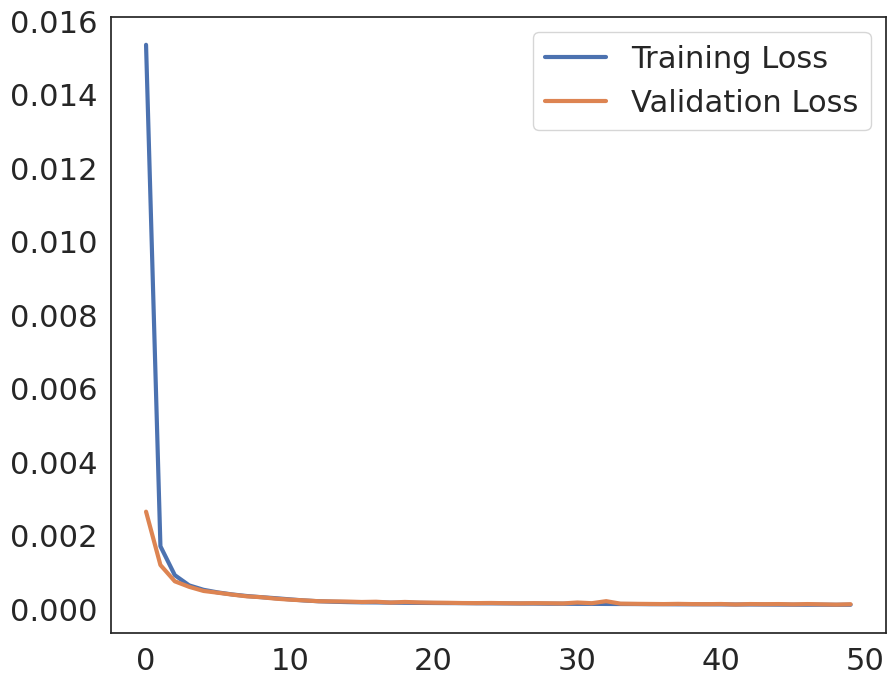

In [44]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(history.history["loss"], label="Training Loss",linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

In [45]:
loss = autoencoder.evaluate(X_test, X_test)

705/705 [==============================] - 1s 1ms/step - loss: 0.0029


In [39]:
print(loss)

0.001591957057826221


In [46]:
encoded_X_train = autoencoder.encoder.predict(X_train)
decoded_X_train = autoencoder.predict(X_train)
mse_train = np.mean(np.power(X_train - decoded_X_train, 2), axis=1)

2105/2105 [==============================] - 3s 1ms/step


In [47]:
threshold = np.mean(mse_train)

In [48]:
threshold

0.00010939690722705651

In [49]:
encoded_X_test = autoencoder.encoder.predict(X_test)
decoded_X_test = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - decoded_X_test, 2), axis=1)

705/705 [==============================] - 1s 1ms/step


In [50]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,1.000000
1,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,1.000000
2,0.000035,0.5,0.301587,0.9,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0.0,1.000000
3,0.000000,0.0,0.206349,0.9,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1.0,0.714286
4,0.000017,0.5,0.873016,0.2,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1.0,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,0.5,0.777778,0.9,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.000000
22540,0.000000,0.5,0.349206,0.9,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.000000
22541,0.000000,0.5,0.349206,0.9,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1.0,0.714286
22542,0.000000,1.0,0.174603,0.9,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.0,1.000000


In [51]:
df_test['attack'].value_counts()

1.0    12833
0.0     9711
Name: attack, dtype: int64